In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d as plt3d
%matplotlib inline

### Functions :::

In [ ]:
def f1(x1,x2):
    return x1**2+2*x2**2

def grad_f1(x1,x2):
    return np.array([2*x1,4*x2])

In [ ]:
def f2(x1,x2):
   return x1**2-2*x2**2

def grad_f2(x1,x2):
    return np.array([2*x1,-4*x2])

In [ ]:
def f3(x1,x2):
    return 0.1*x1**2+2*x2**2

def grad_f3(x1,x2):
    return np.array([0.2*x1,4*x2])

## Visualisation :::

In [ ]:
def contour_p(f_name):
   x=np.linspace(-50,50,10)
   y=np.linspace(-50,50,10)
   x,y=np.meshgrid(x,y)
   z=f_name(x,y)

   plt.figure(figsize=(7,7))
   plt.contour(x,y,z,10)
   plt.grid(True)


In [ ]:
def plot_3d(f_name):
   x = np.linspace(-40,40,60)
   y = np.linspace(-40,40,60)
   X,Y = np.meshgrid(x,y)
   Z = f_name(X,Y)

   fig = plt.figure(figsize=(10,10))
   ax = plt.axes(projection='3d')
   ax.contour3D(X,Y,Z,80)


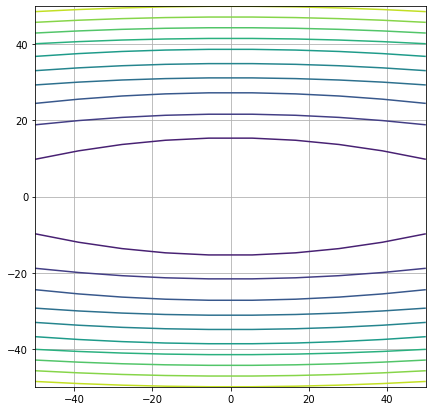

In [ ]:
contour_p(f3)

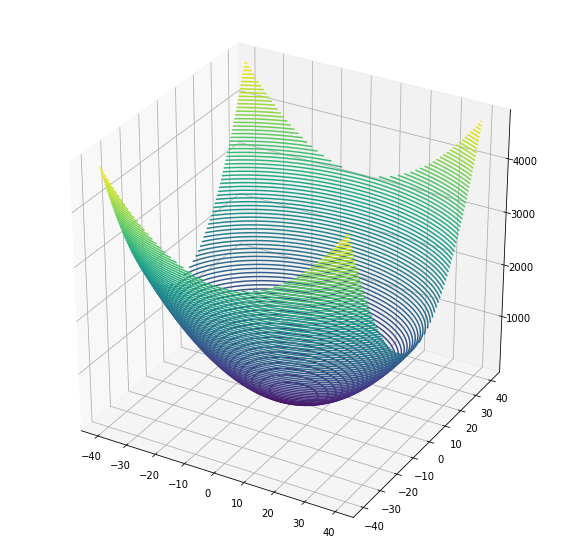

In [ ]:
plot_3d(f1)

# Different Optimization techniques :::

### Decay with constant step-size :

In [ ]:
def cnstnt_gd(f,grad_f,x1,x2,e,noise_status,momentum_status,N=1,beta=0,lamda1=0.1,b=0.5,alpha=0.5):
  """
  Input Parameters :::
  
  f                   : Function on which we are working
  grad_f              : Gradient function of f
  x1                  : x co-ordinate pf starting point
  x2                  : y co-ordinate of starting point
  e                   : Constant step-size
  noise_status        : if True then add noise from standard normal distribution to the step_length, otherwise leave it 
  momentum_status     : if True the deflect the gradient with momentum term
  N                   : batch-size(if noise_type is "mini-batch"),default=1
  beta                : momentum parameter
  lambda              : no use here
  b,alpha             : no use here


  Output Parameters :::

  points              : optimal point
  t                   : no. of iterations took to converge
  functional_value    : optimal function value
  steplen             : here constant
  norm1               : Norm of the gradient

  """
  eta=e
  x=[x1,x2]
  err=100
  X=[x[0],x[1]]
  points=[(x1,x2)]
  t=0
  functional_value=[f(x1,x2)]
  steplen=[eta]
  norm1=[]
  grad=[]

  while err>0.00001:
    t=t+1
    
    # Calculation of noise :::
    if noise_status :
      noise = sum([np.random.randn(2) for i in range(N)])/N
    else :
      noise = 0

    grad_=-grad_f(x[0],x[1])+noise
    grad.append(grad_)
    
    # Calculaton of momentum :::
    if momentum_status :
      momentum = 0
      for i in range(len(grad)):
          momentum = momentum + (beta**i) * grad[-i-1]
      #print(momentum)
    else :
      momentum = grad_
    
    # Updation :::
    X=x+eta*momentum
    norm1.append(np.linalg.norm(-grad_))

    # if f(X[0],X[1])-f(x[0],x[1])>0.00:
    #   eta=eta/2
    steplen.append(eta)  
    points.append((X[0],X[1]))
    err=abs(f(x[0],x[1])-f(X[0],X[1]))
    x=X
    functional_value.append(f(x[0],x[1]))
  
  return points,t,functional_value,steplen,norm1     

### Decay with piece-wise constant step-size :




In [ ]:
def pcwise_cnstnt_gd(f,grad_f,x1,x2,e,noise_status,momentum_status,N=1,beta=0,lambda1=0.1,b=0.5,alpha=0.5):
  """
  Input Parameters :::
  
  f                   : Function on which we are working
  grad_f              : Gradient function of f
  x1                  : x co-ordinate pf starting point
  x2                  : y co-ordinate of starting point
  e                   : Constant step-size
  noise_status        : if True then add noise from standard normal distribution to the step_length, otherwise leave it 
  momentum_status     : if True the deflect the gradient with momentum term
  N                   : batch-size(if noise_type is "mini-batch"),default=1
  beta                : momentum parameter
  lambda1             : no use here
  b,alpha             : no use here


  Output Parameters :::

  points              : optimal point
  t                   : no. of iterations took to converge
  functional_value    : optimal function value
  steplen             : here constant
  norm1               : Norm of the gradient

  """
  eta=e
  x=[x1,x2]
  err=100
  X=[x[0],x[1]]
  points=[(x1,x2)]
  t=0
  functional_value=[f(x1,x2)]
  steplen=[eta]
  norm1=[]
  grad=[]

  while err>0.00001:
    t=t+1
    
    # Calculation of noise :::
    if noise_status :
      noise = sum([np.random.randn(2) for i in range(N)])/N
    else :
      noise = 0

    grad_=-grad_f(x[0],x[1])+noise
    grad.append(grad_)
    
    # Calculaton of momentum :::
    if momentum_status :
      momentum = 0
      for i in range(len(grad)):
          momentum = momentum + (beta**i) * grad[-i-1]
      #print(momentum)
    else :
      momentum = grad_
    
    # Updation :::
    X=x+eta*momentum
    norm1.append(np.linalg.norm(-grad_))

    # Diminishing the step-size when the functional value gets saturated
    if abs(f(X[0],X[1])-f(x[0],x[1]))>0.001:
      eta=eta/2
      
    steplen.append(eta)  
    points.append((X[0],X[1]))
    err=abs(f(x[0],x[1])-f(X[0],X[1]))
    x=X
    functional_value.append(f(x[0],x[1]))
  
  return points,t,functional_value,steplen,norm1     

### Decay with exponential step-size :




In [ ]:
def exp_gd(f,grad_f,x1,x2,e,noise_status,momentum_status,N=1,beta=0,lambda1=0.1,b=0.5,alpha=0.5):
  """
  Input Parameters :::
  
  f                   : Function on which we are working
  grad_f              : Gradient function of f
  x1                  : x co-ordinate pf starting point
  x2                  : y co-ordinate of starting point
  e                   : Constant step-size
  noise_status        : if True then add noise from standard normal distribution to the step_length, otherwise leave it 
  momentum_status     : if True the deflect the gradient with momentum term
  N                   : batch-size(if noise_type is "mini-batch"),default=1
  beta                : momentum parameter
  lambda1             : rate of exponential decrease of step length
  b,alpha             : no use here

  Output Parameters :::

  points              : optimal point
  t                   : no. of iterations took to converge
  functional_value    : optimal function value
  steplen             : here constant
  norm1               : Norm of the gradient

  """
  eta=e
  x=[x1,x2]
  err=100
  X=[x[0],x[1]]
  points=[(x1,x2)]
  t=0
  functional_value=[f(x1,x2)]
  steplen=[eta]
  norm1=[]
  grad=[]

  while err>0.00001:
    t=t+1
    
    # Calculation of noise :::
    if noise_status :
      noise = sum([np.random.randn(2) for i in range(N)])/N
    else :
      noise = 0

    grad_=-grad_f(x[0],x[1])+noise
    grad.append(grad_)
    
    # Calculaton of momentum :::
    if momentum_status :
      momentum = 0
      for i in range(len(grad)):
          momentum = momentum + (beta**i) * grad[-i-1]
      #print(momentum)
    else :
      momentum = grad_
    
    # Updation :::
    X=x+eta*momentum
    norm1.append(np.linalg.norm(-grad_))

    #Updating the step-length :::
    eta=(0.1)*np.exp(-(lambda1*t))

    steplen.append(eta)  
    points.append((X[0],X[1]))
    err=abs(f(x[0],x[1])-f(X[0],X[1]))
    x=X
    functional_value.append(f(x[0],x[1]))
  
  return points,t,functional_value,steplen,norm1     

### Decay with polynomial step-size :




In [ ]:
def pol_gd(f,grad_f,x1,x2,e,noise_status,momentum_status,N=1,beta=0,lambda1=0.1,b=0.5,alpha=0.5):
  """
  Input Parameters :::
  
  f                   : Function on which we are working
  grad_f              : Gradient function of f
  x1                  : x co-ordinate pf starting point
  x2                  : y co-ordinate of starting point
  e                   : Constant step-size
  noise_status        : if True then add noise from standard normal distribution to the step_length, otherwise leave it 
  momentum_status     : if True the deflect the gradient with momentum term
  N                   : batch-size(if noise_type is "mini-batch"),default=1
  beta                : momentum parameter
  lambda1             : no use here
  b,alpha             : polynomial decrease parameters 

  Output Parameters :::

  points              : optimal point
  t                   : no. of iterations took to converge
  functional_value    : optimal function value
  steplen             : here constant
  norm1               : Norm of the gradient

  """
  eta=e
  x=[x1,x2]
  err=100
  X=[x[0],x[1]]
  points=[(x1,x2)]
  t=0
  functional_value=[f(x1,x2)]
  steplen=[eta]
  norm1=[]
  grad=[]

  # # finding the perfect b :::
  # beta1=np.zeros(50)
  # accuracy=[]
  # for i in range(50):
  #   beta1[i]=b
  #   points,n,f_values,steplen,norm=sgd2(8,8,b)
  #   b=b-0.02
  #   a=np.linalg.norm(np.array([0,0])-np.array(points[-1]))
  #   accuracy.append(a)

  # perfect_b=beta1[np.array(accuracy)==min(np.array(accuracy))][0]


  while err>0.00001:
    t=t+1
    
    # Calculation of noise :::
    if noise_status :
      noise = sum([np.random.randn(2) for i in range(N)])/N
    else :
      noise = 0

    grad_=-grad_f(x[0],x[1])+noise
    grad.append(grad_)
    
    # Calculaton of momentum :::
    if momentum_status :
      momentum = 0
      for i in range(len(grad)):
          momentum = momentum + (beta**i) * grad[-i-1]
      #print(momentum)
    else :
      momentum = grad_
    
    # Updation :::
    X=x+eta*momentum
    norm1.append(np.linalg.norm(-grad_))

    #Updating the step-length :::
    eta=0.1*(1+b*t)**(-alpha)

    steplen.append(eta)  
    points.append((X[0],X[1]))
    err=abs(f(x[0],x[1])-f(X[0],X[1]))
    x=X
    functional_value.append(f(x[0],x[1]))
  
  return points,t,functional_value,steplen,norm1     

In [ ]:
def adagrad(f,grad_f,x1,x2,e,noise_status=False,momentum_status=False,N=1,beta=0,lambda1=0.0,b=0.0,alpha=0.0):

  
  """
  Input Parameters :::
  
  f                   : Function on which we are working
  grad_f              : Gradient function of f
  x1                  : x co-ordinate pf starting point
  x2                  : y co-ordinate of starting point
  e                   : Constant step-size
  noise_status        : not needed here 
  momentum_status     : not needed here
  N                   : not needed here
  beta                : not needed here
  lambda1             : not needed here
  b,alpha             : not needed here 

  Output Parameters :::

  points              : optimal point
  t                   : no. of iterations took to converge
  functional_value    : optimal function value
  steplen             : here constant
  norm1               : Norm of the gradient

  """

  v = np.zeros(2)
  z = np.array([x1,x2])
  Z = np.zeros(2)
  t = 0
  err = 100
  epsilon = 0.001

  points=[(z[0],z[1])]
  functional_value = [f(x1,x2)]
  steplen = e
  norm1 = [np.linalg.norm(grad_f(z[0],z[1]))]

  while err>0.001:
    t += 1
    v = v + grad_f(z[0],z[1])**2
    Z = z - e/np.sqrt(v + epsilon) * grad_f(z[0],z[1])
  
    norm1.append(grad_f(Z[0],Z[1]))
    functional_value = [f(Z[0],Z[1])]

    err = np.linalg.norm(Z-z)
    z = Z
    points.append((z[0],z[1]))

  return points,t,functional_value,steplen,norm1

In [ ]:
def rmsprop(f,grad_f,x1,x2,e,noise_status=False,momentum_status=False,N=1,beta=0,lambda1=0.0,b=0.0,alpha=0.0):

  
  """
  Input Parameters :::
  
  f                   : Function on which we are working
  grad_f              : Gradient function of f
  x1                  : x co-ordinate pf starting point
  x2                  : y co-ordinate of starting point
  e                   : Constant step-size
  noise_status        : not needed here 
  momentum_status     : not needed here
  N                   : not needed here
  beta                : constant
  lambda1             : not needed here
  b,alpha             : not needed here 

  Output Parameters :::

  points              : optimal point
  t                   : no. of iterations took to converge
  functional_value    : optimal function value
  steplen             : here constant
  norm1               : Norm of the gradient

  """

  v = np.zeros(2)
  z = np.array([x1,x2])
  Z = np.zeros(2)
  t = 0
  err = 100
  epsilon = 0.001

  points=[(z[0],z[1])]
  functional_value = [f(x1,x2)]
  steplen = e
  norm1 = [np.linalg.norm(grad_f(z[0],z[1]))]

  while err>0.001:
    t += 1
    v = beta*v + (1-beta)*grad_f(z[0],z[1])**2
    Z = z - e/np.sqrt(v + epsilon) * grad_f(z[0],z[1])
  
    norm1.append(grad_f(Z[0],Z[1]))
    functional_value = [f(Z[0],Z[1])]

    err = np.linalg.norm(Z-z)
    z = Z
    points.append((z[0],z[1]))

  return points,t,functional_value,steplen,norm1

In [ ]:
def adadelta(f,grad_f,x1,x2,e,noise_status=False,momentum_status=False,N=1,beta=0,lambda1=0.0,b=0.0,alpha=0.0):

  
  """
  Input Parameters :::
  
  f                   : Function on which we are working
  grad_f              : Gradient function of f
  x1                  : x co-ordinate pf starting point
  x2                  : y co-ordinate of starting point
  e                   : Constant step-size
  noise_status        : not needed here 
  momentum_status     : not needed here
  N                   : not needed here
  beta                : constant
  lambda1             : not needed here
  b,alpha             : not needed here 

  Output Parameters :::

  points              : optimal point
  t                   : no. of iterations took to converge
  functional_value    : optimal function value
  steplen             : here constant
  norm1               : Norm of the gradient

  """

  v = np.zeros(2)
  z = np.array([x1,x2])
  Z = np.zeros(2)
  t = 0
  err = 100
  epsilon = 0.001

  points=[(z[0],z[1])]
  functional_value = [f(x1,x2)]
  steplen = e
  norm1 = [np.linalg.norm(grad_f(z[0],z[1]))]

  while err>0.001:
    t += 1
    v = beta*v + (1-beta)*grad_f(z[0],z[1])**2
    Z = z - e/np.sqrt(v + epsilon) * grad_f(z[0],z[1])
  
    norm1.append(grad_f(Z[0],Z[1]))
    functional_value = [f(Z[0],Z[1])]

    err = np.linalg.norm(Z-z)
    z = Z
    points.append((z[0],z[1]))

  return points,t,functional_value,steplen,norm1

# Results :

In [ ]:
def split(a):
    x=[]
    y=[]
    for i in range(len(a)):
        x.append(a[i][0])
        y.append(a[i][1])
        
    return x,y    

In [ ]:
def result(f_name,f,grad_f,x1,x2,e,noise_status=False,momentum_status=False,N=1,beta=0,lambda1=0,b=0,alpha=0):

  """
  Input Parameters :::
  
  f_name              : Name of the optimization technique
  f                   : Function on which we are working
  grad_f              : Gradient function of f
  x1                  : x co-ordinate pf starting point
  x2                  : y co-ordinate of starting point
  e                   : Constant step-size
  noise_status        : if True then add noise from standard normal distribution to the step_length, otherwise leave it 
  momentum_status     : if True the deflect the gradient with momentum term
  N                   : batch-size(if noise_type is "mini-batch"),default=1
  beta                : momentum parameter
  lambda1             : rate of exponential decrease of step length
  b,alpha             : polynomial decrease parameters


  """


  points1,n,f_values,steplen,norm = f_name(f,grad_f,x1,x2,e,noise_status,momentum_status,N,beta,lambda1,b,alpha)
  X,Y=split(points1)
  print("No. of iteration : ",n)
  print("Optimal point :",X[-1],Y[-1])
  print("Optimal Function Value :",f_values[-1])
  print("Standard deviation of the gradient : ",np.std(norm))
  print("Mean norm of the gradient : ",np.mean(norm))
  print("")
  print("")

  x=np.linspace(-20,20,40)
  y=np.linspace(-20,20,40)
  x,y=np.meshgrid(x,y)
  z=f(x,y)

  plt.figure(figsize=(7,7))
  plt.contour(x,y,z,10)
  plt.grid(True)
  plt.axis('scaled')
  plt.xlabel('x-axis')
  plt.ylabel('y-axis')
  plt.plot(X,Y,'-*')


## **Input Parameters :::**
  
  **f_name**              : Name of the optimization technique (cnstnt_gd,pcwise_cnstnt_gd,exp_gd,pol_gd) \\
  **f**                   : Function on which we are working \\
  **grad_f**              : Gradient function of f \\
  **x1**                  : x co-ordinate pf starting point \\
  **x2**                  : y co-ordinate of starting point \\
  **e**                   : Constant step-size \\
  **noise_status**        : if True then add noise from standard normal distribution to the step_length, otherwise leave it \\
  **momentum_status**     : if True the deflect the gradient with momentum term
  \\
  **N**                   : batch-size(if noise_type is "mini-batch"),default=1 \\
  **beta**                : momentum parameter \\
  **lambda1**             : rate of exponential decrease of step length \\
  **b,alpha**             : polynomial decrease parameters \\


No. of iteration :  24761
Optimal point : 1.709247691929175 0.2428219892127941
Optimal Function Value : 3.0394527092557286
Standard deviation of the gradient :  1.4168389737717322
Mean norm of the gradient :  5.1805522558954165




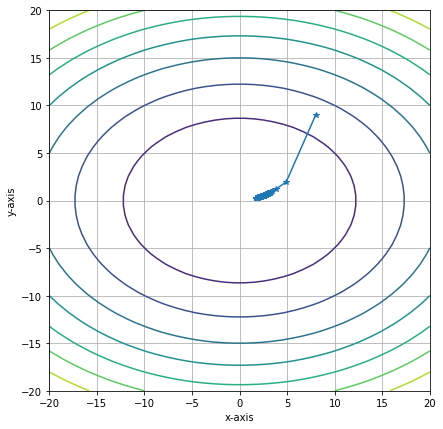

In [ ]:
result(pcwise_cnstnt_gd,f1,grad_f1,x1=8,x2=9,e=0.2,noise_status=True,momentum_status=False,N=1,beta=0.2,lambda1=0.2,b=0.8,alpha=0.5)

No. of iteration :  3
Optimal point : 1.9522706756835983e-11 -3.0517544752658973e-19
Optimal Function Value : 3.8113607911341126e-23
Standard deviation of the gradient :  [17.34210911 17.342147  ]
Mean norm of the gradient :  [10.01255469 10.01248907]




/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


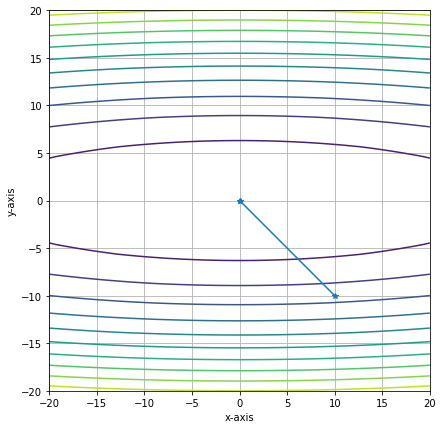

In [ ]:
result(adagrad,f3,grad_f3,x1=10,x2=-10,e=10)

No. of iteration :  19
Optimal point : 1.6223460095304477e-06 -5.807937925745633e-05
Optimal Function Value : 6.7466917905203614e-09
Standard deviation of the gradient :  [ 9.51601999 13.34856321]
Mean norm of the gradient :  [ 2.62266944 12.60615416]




/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


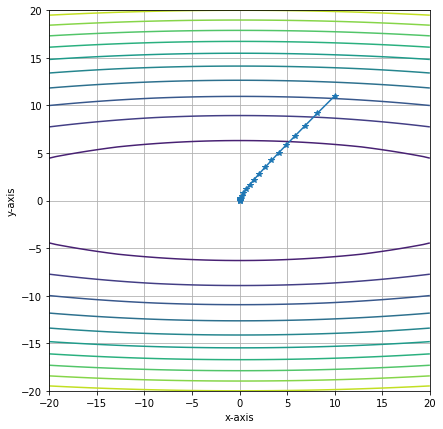

In [ ]:
result(rmsprop,f3,grad_f3,x1=10,x2=11,e=1,beta=0.7)